In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display, clear_output
from datetime import datetime, timedelta

In [2]:
datarm = pd.read_excel('purace.xlsx')

In [3]:
# Define variables and their ranges
variables = {
    'Resultado_Conductividad': (80, 90),
    'Resultado_Cloruros': (5, 10),
    'Resultado_Sulfatos': (10, 10.5),
    'Resultado_Floruros': (0.05, 0.15),
    'Resultado_Nitratos': (0.5, 3),
    'Resultado_Nitritos': (0.009, 0.015),
    'Resultado_Calcio': (5, 10),
    'Resultado_Magnesio': (2.5, 10),
    'Resultado_Hierro_Total': (0.09, 0.20),
    'Resultado_Molibdeno': (0.0049, 0.0051),
    'Resultado_Zinc': (0.05, 0.10),
    'Resultado_Fosfatos': (0.1, 0.3)
}

municipalities = [
    'CAJIBIO', 'EL TAMBO', 'INZA', 'LA SIERRA', 'LA VEGA', 'PATIA',
    'PIENDAMO', 'PURACE', 'ROSAS', 'SILVIA', 'SOTARA', 'SUCRE',
    'TIMBIO', 'TOTORO', 'ISNOS', 'LA ARGENTINA', 'LA PLATA', 'OPORAPA',
    'SALADOBLANCO', 'SAN AGUSTIN'
]

# Define the date range
start_date = datetime.strptime('08/05/2024', '%d/%m/%Y')
end_date = datetime.strptime('15/05/2024', '%d/%m/%Y')
date_range = pd.date_range(start_date, end_date)

# Function to generate uniform data within a specified range
def generate_uniform_data(low, high, size):
    return np.random.uniform(low, high, size)

# Generate synthetic data
synthetic_data = []

for municipality in municipalities:
    for date in date_range:
        record = {
            'Municipio PP': municipality,
            'Fecha de toma': date,
            'Año': date.year
        }
        for variable, (low, high) in variables.items():
            record[variable] = generate_uniform_data(low, high, 1)[0]
        
        synthetic_data.append(record)

# Convert to DataFrame
synthetic_df = pd.DataFrame(synthetic_data)

# Append to existing datarm dataframe using pd.concat
datarm = pd.concat([datarm, synthetic_df], ignore_index=True)

In [4]:
# Optimize plotting

# Create a new column for the period category
def categorize_date(date):
    if date.year == 2023:
        return '2023'
    elif date <= pd.Timestamp('2024-05-06'):
        return '01/01/2024 a 06/05/2024'
    elif (date > pd.Timestamp('2024-05-06')) and (date < pd.Timestamp('2024-05-15')):
        return '07/05/2024 a 14/05/2024'
    else:
        return '15/05/2024 a 21/05/2021'

datarm['Período'] = datarm['Fecha de toma'].apply(categorize_date)

# Define a custom color palette
custom_palette = {
    '2023': 'tab:blue',
    '01/01/2024 a 06/05/2024': 'tab:orange',
    '07/05/2024 a 14/05/2024': 'tab:green',
    '15/05/2024 a 21/05/2021' : 'tab:cyan'
}

<center> <h1>Seguimiento a la evolución de los parámetros fisicoquímicos reportados al SIVICAP en los municipios en riesgo por erupción del volcán Puracé</h1> </center>

<p style='text-align: justify;'>
El 3 de mayo de 2024, el Servicio Geológico Colombiano (SGC) informó que el estado de alerta del volcán cambiaba a naranja, indicando así una mayor probabilidad de ocurrencia de una erupción. Los municipios de Cajibío, El Tambo, Inza, La Sierra, La Vega, Patía, Piendamó, Puracé, Rosas, Silvia, Sotará, Sucre, Timbío, Totoró e Isnos en el Cauca y La Argentina, La Plata, Oporapa, Saladoblanco y San Agustín en el Huila, se encuentran en la zona de riesgo por afectación debido a una probable erupción. La calidad del agua para consumo humano podría alterarse como consecuencia de la presencia de ceniza liberada por el volcán. Por esa razón, el Instituto Nacional de Salud (INS) lleva a cabo un análisis del comportamiento de esos parámetros, de manera que se puedan identificar, anticipadamente, patrones o señales de alteración de la calidad del agua para consumo humano que hagan necesario tomar medidas de prevención para proteger la salud de la población en la zona de riesgo. 
</p>

<p style='text-align: justify;'>
Como parte de la vigilancia que las autoridades adelantan en su jurisdicción se reportaron al Sistema de Vigilancia de la Calidad del Agua Potable (SIVICAP), durante 2023, 365 registros de parámetros fisicoquímicos evaluados en el agua para consumo humano, mientras que durante el período comprendido entre el 1 de enero de 2024 y el 7 de mayo de 2024 se hicieron 21 registros. En este análisis, se incluyeron los resultados de las pruebas de conductividad, cloruros, sulfatos, fluoruros, nitratos, nitritos, calcio, magnesio, hierro total, molibdeno, zinc y fosfatos, que fueron objeto de seguimiento durante los períodos correspondientes al 2023, entre el 1 de enero y el 7 de mayo de 2024, entre el 8 y el 15 de mayo de 2024, así como entre el 15 y 21 de mayo de 2024
</p>

<p style='text-align: justify;'>
A continuación, se puede consultar el comportamiento en forma de boxplots que muestran la distribución de los resultados para cada uno de los municipios y variables de interés descritas. En primer lugar, se puede interactuar con cada variable, seleccionándola de un listado desplegable, con el fin de observar su comportamiento para cada uno de los municipios en riesgo; mientras que en la segunda figura se  muestra un panorama general del comportamiento para todos los parámetros.
</p>

<center> <h1>Análisis del comportamiento de los parámetros reportado al SIVICAP</h1> </center>

<p style='text-align: justify;'>
Con base en el comportamiento observado en la figura, es claro que no se cuenta con datos suficientes, durante el período comprendido entre el 1 de enero de 2024 y el 7 de mayo de 2024, para poder comparar con el comportamiento de referencia de los parámetros, que es el registrado durante 2023. En el caso de los nitratos, nitritos y magnesio se cuenta con datos para casi toso los municipios, pero solamente para 2023. Solo se cuenta con datos del período que va desde el 1 de enero de 2024 al 7 de mayo de 2024 para cloruros en La Plata y San Agustín, en el Huila. Se requiere efectuar las mediciones correspondientes en todos los municipios afectados para poder hacer una comparación efectiva e identificar así alguna anomalía en el comportamiento que sugiera una posible afectación a la calidad de la fuente de agua potable y permita tomar medidas de protección temprana a la población de esos municipios. Los datos del período entre el 8 y el 15 de mayo de 2024 fueron generados artificialmente con el fin de ejemplificar el comportamiento que se podría presentar en caso de no ocurrir una afectación debida a la ceniza del volcán y serán actualizados en la medida en que se cuente con datos reales.
</p>

In [5]:
# Melt the dataframe to long format for Plotly
df_long = datarm.melt(id_vars=['Municipio PP', 'Fecha de toma'], 
                      value_vars=list(variables.keys()),
                      var_name='Variable', value_name='Value')

df_long['Período'] = df_long['Fecha de toma'].apply(categorize_date)

# Create a dropdown for selecting the variable
variable_dropdown = widgets.Dropdown(
    options=[var for var in df_long['Variable'].unique()],
    value='Resultado_Conductividad',
    description='Variable:',
    disabled=False,
)

# Create an output widget for the plot
output = widgets.Output()

# Create a function to update the boxplot based on the selected variable
def update_boxplot(selected_variable):
    with output:
        clear_output(wait=True)
        filtered_data = df_long[df_long['Variable'] == selected_variable]
        
        if filtered_data.empty:
            fig = go.Figure()  # Return an empty plot if no data available
            fig.update_layout(
                title='No data available for the selected variable'
            )
        else:
            # Create the boxplot
            fig = px.box(filtered_data, 
                         x='Value', 
                         y='Municipio PP', 
                         color='Período', 
                         category_orders={'Período': ['2023', '01/01/2024 a 07/05/2024', '08/05/2024 a 15/05/2024']},
                         labels={'Value': selected_variable, 'Municipio PP': 'Municipio', 'Período': 'Período'},
                         title=f'Parámetros IRCA en los municipios en riesgo por erupción del volcán Puracé')
            
            fig.update_layout(
                boxmode='group',
                height=800,
                width=1000,
                title_x=0.5,
                legend_title_text='Período'
            )
        
        fig.show()

# Function to handle dropdown change
def on_value_change(change):
    update_boxplot(change['new'])

# Attach the function to the dropdown
variable_dropdown.observe(on_value_change, names='value')

# Display the widgets and the initial plot
display(variable_dropdown, output)

# Show the initial plot
update_boxplot(variable_dropdown.value)


Dropdown(description='Variable:', options=('Resultado_Conductividad', 'Resultado_Cloruros', 'Resultado_Sulfato…

Output()

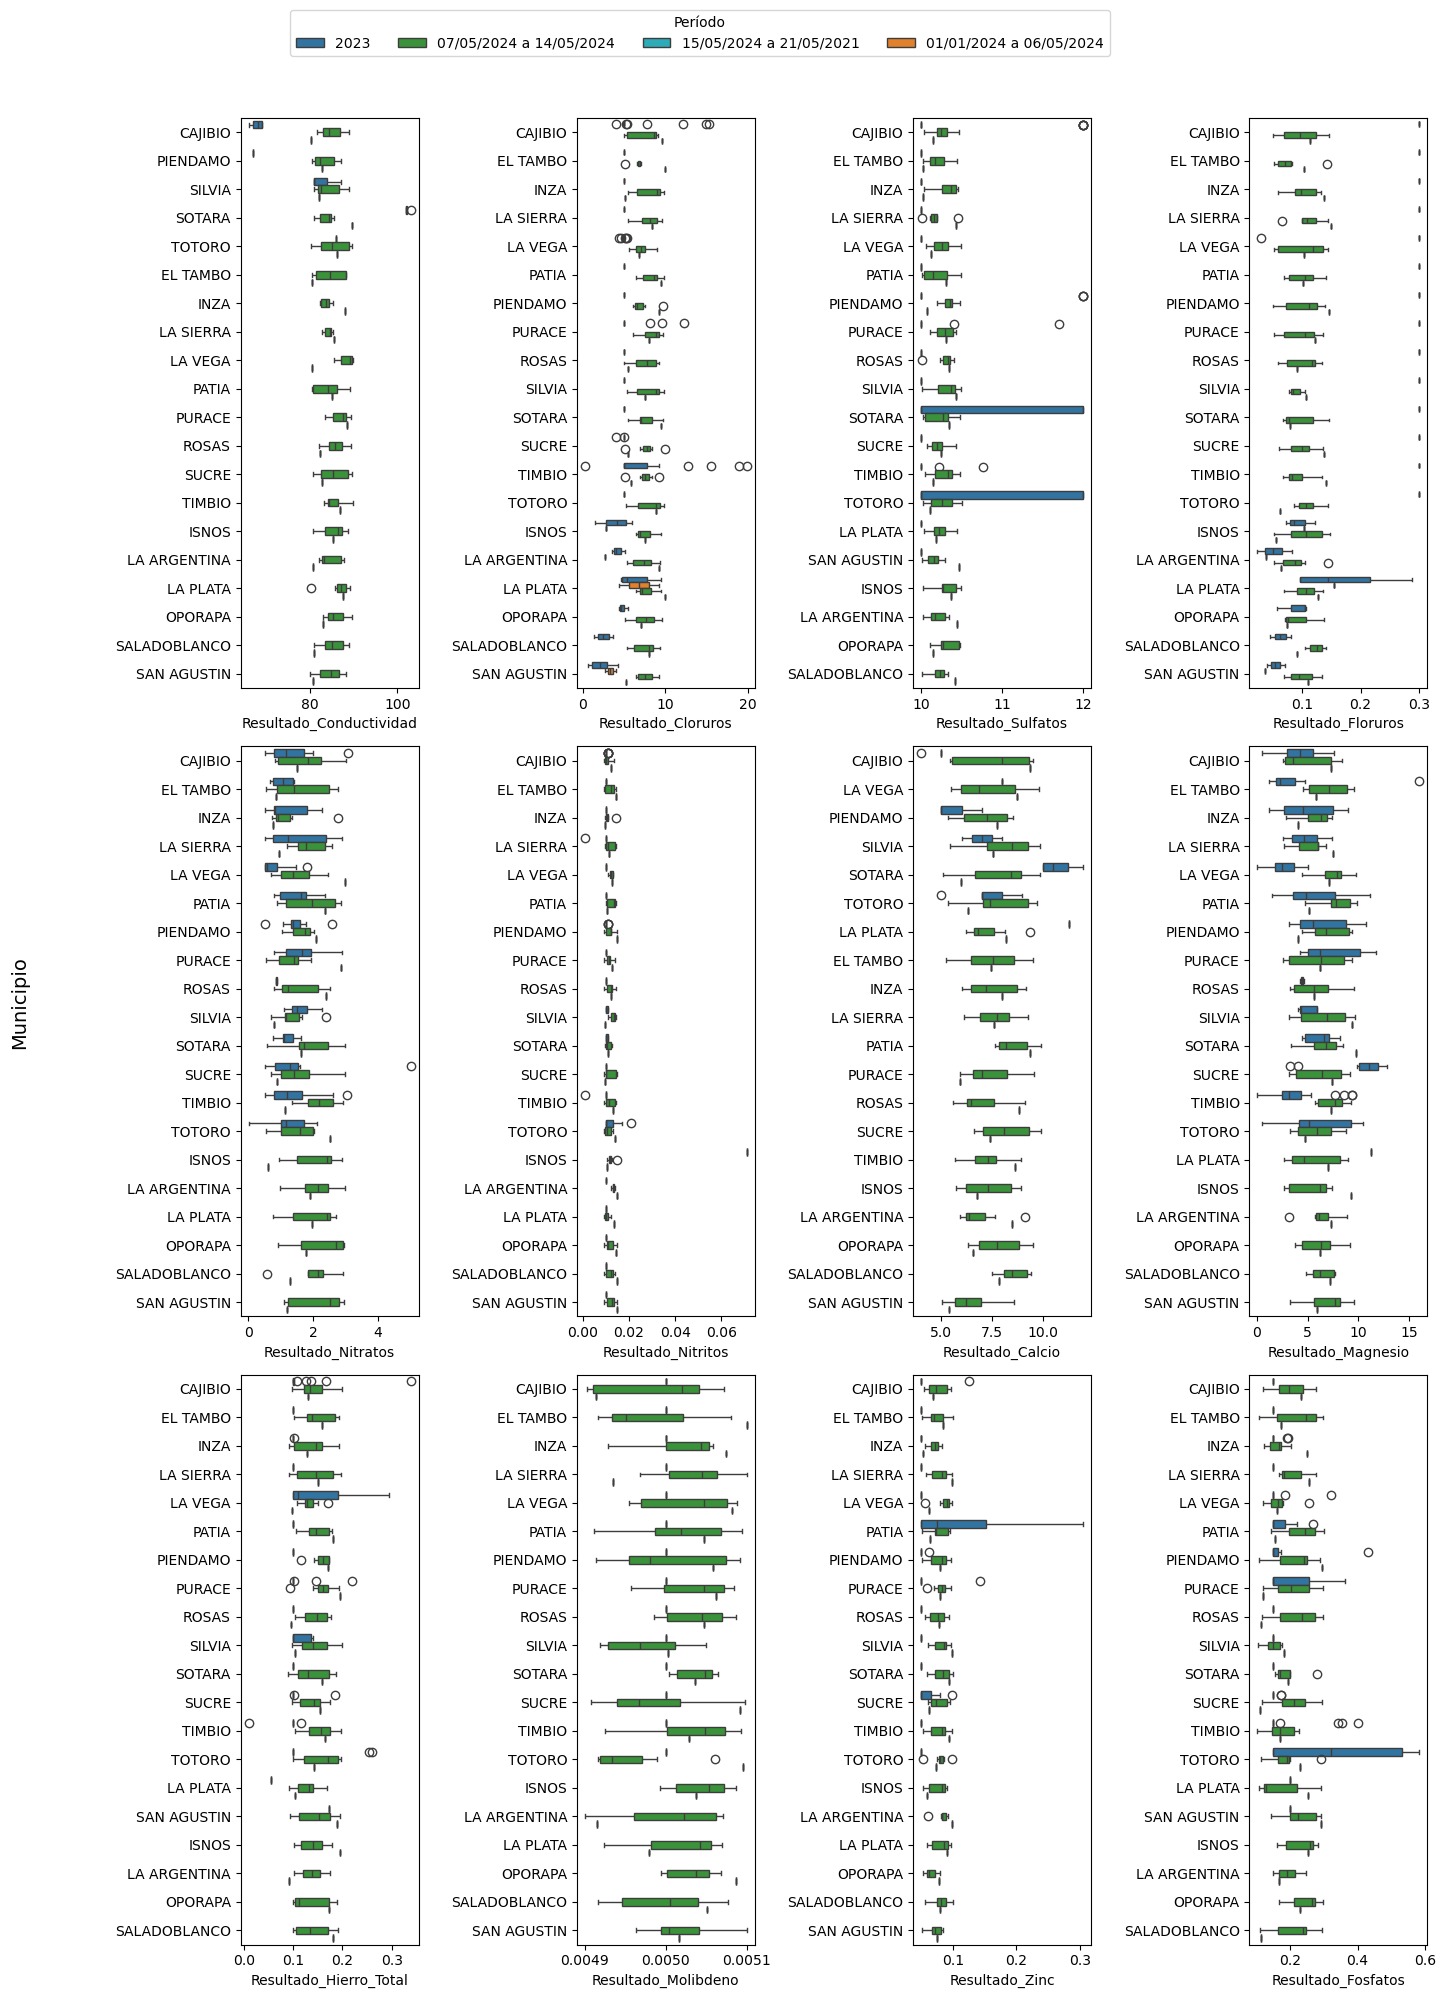

In [6]:
# Minimum number of data points required to plot a boxplot
min_data_points = 3
# Set up the figure with 12 subplots arranged in a 4x3 grid
fig, axes = plt.subplots(3, 4, figsize=(15, 20))
axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array

all_handles = []  # List to store all handles for the legend
all_labels = []  # List to store all labels for the legend

# Iterate over the variables and corresponding axes
for var, ax in zip(variables, axes):
    # Filter out rows where the variable is null and ensure a minimum of 3 data points per municipality
    filtered_data = datarm.dropna(subset=[var])  # Drop rows where the variable data is null
    filtered_data = filtered_data.groupby('Municipio PP').filter(lambda x: x[var].count() >= min_data_points)
    
    if not filtered_data.empty:
        # Separate constant data from non-constant data
        constant_data = filtered_data.groupby('Municipio PP').filter(lambda x: x[var].nunique() == 1)
        non_constant_data = filtered_data.groupby('Municipio PP').filter(lambda x: x[var].nunique() > 1)
        
        # Plot non-constant data with boxplot
        if not non_constant_data.empty:
            bp = sns.boxplot(
                data=non_constant_data, 
                x=var, 
                y='Municipio PP', 
                hue='Período', 
                palette=custom_palette, 
                ax=ax
            )
            
            # Add handles and labels from each plot to the list
            handles, labels = ax.get_legend_handles_labels()
            for handle, label in zip(handles, labels):
                if label not in all_labels:
                    all_handles.append(handle)
                    all_labels.append(label)
                    
            ax.get_legend().remove()  # Remove individual plot legends

        # Plot constant data with 'X' marker
        if not constant_data.empty:
            for municipio in constant_data['Municipio PP'].unique():
                const_value = constant_data[constant_data['Municipio PP'] == municipio][var].iloc[0]
                ax.plot([const_value], [municipio], 'x', color='red', markersize=10, label='_nolegend_')
    
    # Set x_label for each plot
    ax.set_xlabel(var)
    ax.set_ylabel('')  # Remove individual y-labels
    
    if filtered_data.empty:
        ax.set_visible(False)  # Hide axis if no data available

# Create a single, general legend with all periods
fig.legend(all_handles, all_labels, loc='upper center', bbox_to_anchor=(0.5, 1.0), title='Período', ncol=len(all_labels))

# Add a single y-axis label for 'Municipio PP' on the left-hand side of the plot
fig.text(0.04, 0.5, 'Municipio', va='center', rotation='vertical', fontsize=14)

# Adjust layout to make space for the top legend and ensure plots are spaced properly
fig.tight_layout(rect=[0.1, 0, 1, 0.95])  # Leave space at the top for the legend and on the left for y-axis label

plt.show()